In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
import numpy as np

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=42)

scale = StandardScaler()

# X_train_scaled and X_test_scaled are arrays
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.1)

In [ ]:
lasso.coef_

array([0.        , 0.1115119 , 0.        , 0.        , 0.        ,
       0.02291842, 0.        , 0.00329461])

<Axes: >

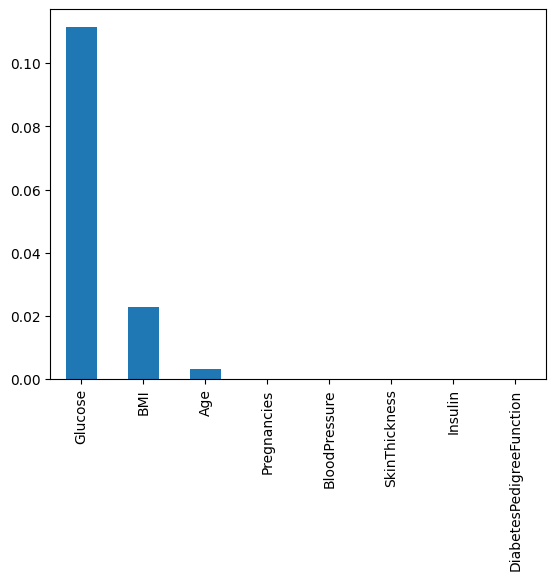

In [ ]:
x = pd.Series(np.abs(lasso.coef_),index=X_train.columns)
x.sort_values(ascending=False).plot(kind='bar')

In [ ]:
# Using RandomForestClassifier on X_train

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

<Axes: >

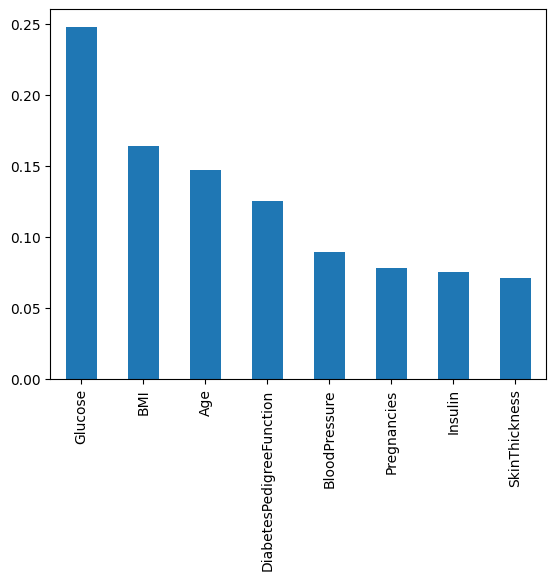

In [ ]:
x = pd.Series(np.abs(rfc.feature_importances_),index=X_train.columns)

x.sort_values(ascending=False).plot(kind='bar')

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
sfm = SelectFromModel(dtc,threshold='mean')
sfm.fit(X_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [ ]:
sfm.get_support(indices=True)

array([1, 2, 5])

In [ ]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BloodPressure', 'BMI'], dtype=object)

In [ ]:
X_train_transformed = sfm.transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_transformed.head()

,Glucose,BloodPressure,BMI
0,84.0,0.0,0.0
1,112.0,82.0,28.2
2,139.0,46.0,28.7
3,161.0,50.0,21.9
4,134.0,80.0,46.2


# Recursive Feature Selection

In [ ]:
# Using RandomForestClassifier
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

rfc = RandomForestClassifier()

rfe = RFE(estimator=rfc,n_features_to_select=2)
rfe.fit(X,y)

ranking = rfe.ranking_

for i,feature in enumerate(X.columns):
  print(feature,ranking[i])


sepal_length 2
sepal_width 3
petal_length 1
petal_width 1


## Mutual Info Classif

In [ ]:
mi = mutual_info_classif(X,y)

for i, feature in enumerate(X.columns):
  print(feature,round(mi[i],2))

sepal_length 0.53
sepal_width 0.24
petal_length 0.98
petal_width 1.01


## Select K best

In [ ]:
kbest = SelectKBest(mutual_info_classif,k=2)
kbest.fit(X,y)


print(X.columns)
kbest.get_support(indices=True)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


array([2, 3])